<a href="https://colab.research.google.com/github/kelleyl54/DSPS_LKelley/blob/master/HW6_lKelley/DSPS_HW6_lKelley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

# Get the data

Download the supernova (SN) data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it (untar unzip) within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [1]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
mkdir "drive/My Drive/dsps2019/data"

mkdir: cannot create directory ‘drive/My Drive/dsps2019/data’: File exists


In [3]:
!wget http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz

--2019-10-17 15:47:58--  http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
Resolving supernovae.in2p3.fr (supernovae.in2p3.fr)... 134.158.152.153
Connecting to supernovae.in2p3.fr (supernovae.in2p3.fr)|134.158.152.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23716633 (23M) [application/x-gzip]
Saving to: ‘jla_likelihood_v6.tgz’

jla_likelihood_v6.t 100%[===================>]  22.62M  5.38MB/s    in 6.8s    

2019-10-17 15:48:05 (3.33 MB/s) - ‘jla_likelihood_v6.tgz’ saved [23716633/23716633]



In [4]:
ls

drive/  jla_likelihood_v6.tgz  sample_data/


In [0]:
!tar -xf jla_likelihood_v6.tgz

In [6]:
ls jla_likelihood_v6/data

jla.dataset            JLA.paramnames         jla_v0_covmatrix.dat
jla_lcparams.txt       jla_simple.dataset     jla_vab_covmatrix.dat
jla_mub_covmatrix.dat  jla_simple.dataset~    jla_va_covmatrix.dat
jla_mub.txt            jla_v0a_covmatrix.dat  jla_vb_covmatrix.dat
jla_mub.txt~           jla_v0b_covmatrix.dat


In [0]:
mv jla_likelihood_v6/data/jla_lcparams.txt "drive/My Drive/dsps2019/data"

In [8]:
ls "drive/My Drive/dsps2019/data"

jla_lcparams.txt


In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
import matplotlib.pyplot as pl
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
jla = pd.read_csv("drive/My Drive/dsps2019/data/jla_lcparams.txt", sep=" ")

In [11]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [12]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [13]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

Use pandas scatter matrix to see the relationship between variables (Lab6). If you look in HW5 you can see how to rotate the labels

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


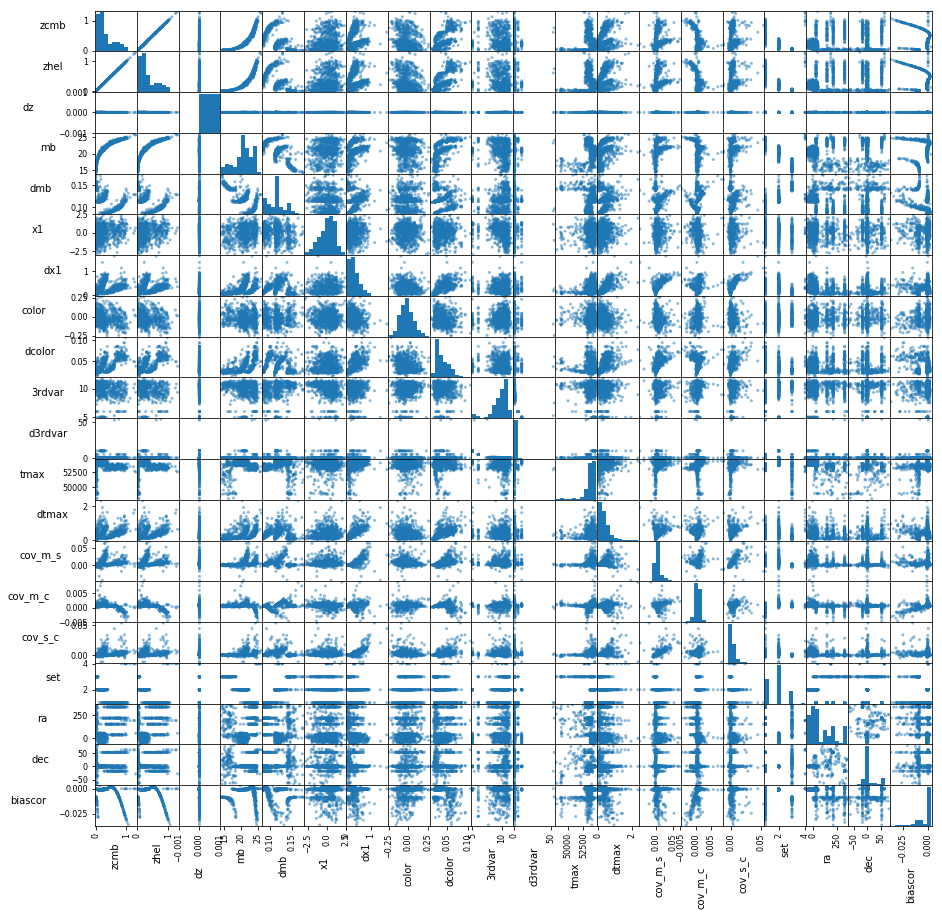

In [46]:
axes = pd.plotting.scatter_matrix(jla, figsize=(15,15));
n = len(jla.columns)-1
for x in range(n):
  for y in range(n):
    ax=axes[x, y]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 30

**Figure 1: A scatter matrix of all paramters from the jla dataframe. The above figure helps demonstrate the relationship between each of these variables and the type of trend the variables have in relation to one another.**

The target variables for our analysis are redshift and brightness: "zcmb" and "mb". This an exercise about fitting lines to data. Why does it lot look like there is a line relationship between them? How can does the relationship look? Plot the "zcmb" vs "mb". Include the y uncertainty which is reported in "dmb". Plot each data point with a different color based on the survey it comes from. The survey data is indicated by the variable "set". To do it you can use the dataframe plotting methods (```df.plot.scatter()```),  or pylab:  ```pylab.scatter()```, or ```pylab.plot()``` --asking to plot the data as point ('.')-- but for each the way you relate the color to a column value is a bit different. Stackoverflow is your friend here!

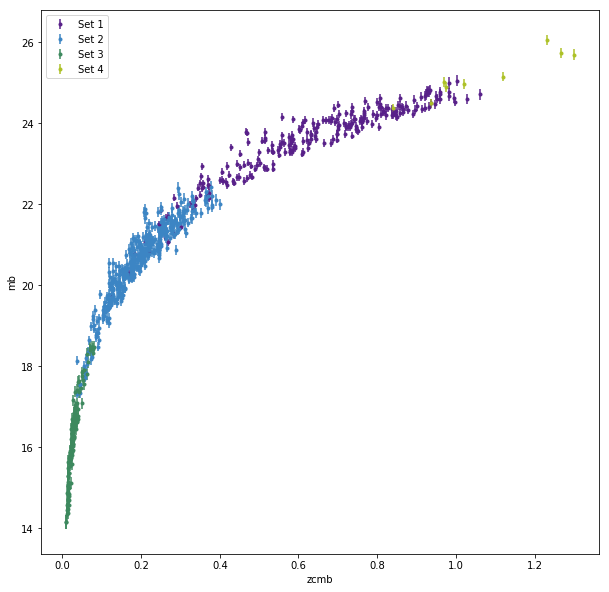

In [16]:
set1 = jla[jla.set==1]
set2 = jla[jla.set==2]
set3 = jla[jla.set==3]
set4 = jla[jla.set==4]

pl.figure(figsize = (10,10))

pl.errorbar(set1.zcmb, set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(set2.zcmb, set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(set3.zcmb, set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(set4.zcmb, set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');

pl.xlabel("zcmb");
pl.ylabel("mb");
pl.legend(["Set 1", "Set 2", "Set 3", "Set 4"])

**Figure 1:** Scatter plot of he four data sets for mb compared to zcmb. This plot shows the log relation between these two data sets, which will later be optimized.

It is a **power law**, which means it will be linear in logarithmic space - specifically in log10(_x_) vs natural _y_ space.

Replot the data with natural y axis and logarithmic x axis, you can do that by taking the log of the data and then plotting it or by using plot functionalities (e.g. for ```df.plot.scatter()``` you can use ```logx=True```)

Note that when we talk about log we (generally) talk about log base 10! 


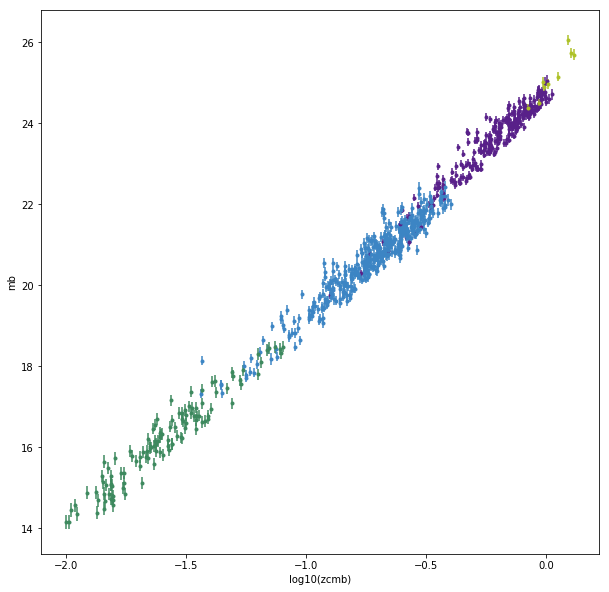

In [17]:
set1 = jla[jla.set==1]
set2 = jla[jla.set==2]
set3 = jla[jla.set==3]
set4 = jla[jla.set==4]

pl.figure(figsize = (10,10))

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');

pl.xlabel("log10(zcmb)");
pl.ylabel("mb");

**Figure 2:** The same data as in the previously figure, but plotted on a log10 scale for zcmb. This figure demonstrates the property stated in the previous figure that there is a log10 relationship between zcmb and mb for the jla dataset.

# Fit a line to the data with scipy

For each model you fit below you should make a plot of the data and the model. Consider your fit to the data with the uncertainties your "baseline fit"

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it without and with the uncertainties on your _y_ data (the ```curvefit``` argument to include uncertainties in the endogenous variable is ```sigma```). Report the variace and the covariance by printing your mode uncertainties explicitly as below:





In [0]:
#delete
def line(x, a, b):
  return a * x + b

In [0]:
popt1, pcov1 = curve_fit(line, np.log10((jla.zcmb)), jla.mb)

In [20]:
popt1

array([ 5.37205483, 24.65623053])

In [21]:
pcov1

array([[0.00049493, 0.00034561],
       [0.00034561, 0.00036056]])

In [49]:
print("values obtained for the first fit (without error bars): ")
print(f'slope = {popt1[0]:0.3f} ± {(pcov1[0][0]**0.5):0.3f}')
print(f'intercept = {popt1[1]:0.3f} ± {(pcov1[1][1]**0.5):0.3f}')
print(f'parameter covariance = {pcov1[0][1]:0.5f}')

values obtained for the first fit (without error bars): 
slope = 5.372 ± 0.022
intercept = 24.656 ± 0.019
parameter covariance = 0.00035


In [0]:
plottedX = np.log10(jla.zcmb)
sorter = np.argsort(plottedX)

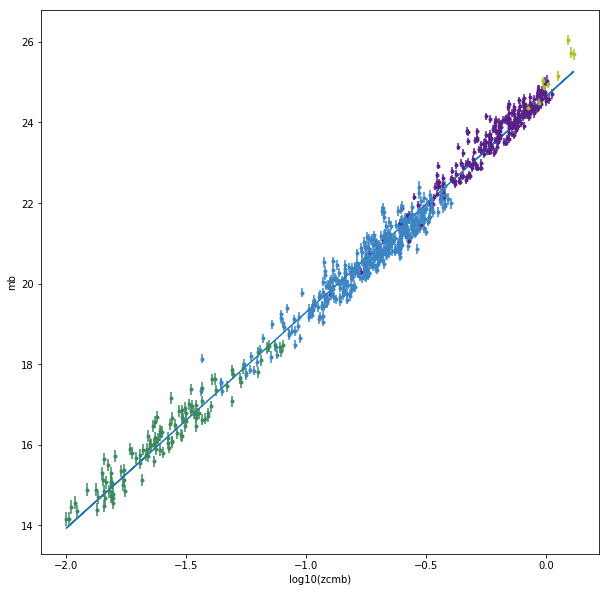

In [23]:
pl.figure(figsize=(10,10))

pl.plot(np.log10(jla.zcmb), line(plottedX, popt1[0], popt1[1]))

pl.fill_between(plottedX[sorter], 
                line(plottedX[sorter], popt1[0] + pcov1[0][0]**0.5, popt1[1] + pcov1[1][1]**0.5),
                line(plottedX[sorter], popt1[0] - pcov1[0][0]**0.5, popt1[1] - pcov1[1][1]**0.5), alpha=0.5)

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');


pl.xlabel("log10(zcmb)");
pl.ylabel("mb");

**Figure 3:** Linear fit of the data in the log10 space without including the uncertainties in the fit. The fit line is plotted with the uncertainty band as done previously. However, for this fit and data set the uncertainty band is so small as to be almost unnoticeable to the eye.

hint: remember to sort the data!

In [24]:
popt2, pcov2 = curve_fit(line, np.log10((jla.zcmb)), jla.mb, sigma = jla.dmb)
print(popt2)
print(pcov2)

[ 5.42599016 24.6961156 ]
[[0.000604   0.00035954]
 [0.00035954 0.00032853]]


In [50]:
print("values obtained for the second fit (with error bars): ")
print(f'slope = {popt2[0]:0.3f} ± {(pcov2[0][0]**0.5):0.3f}')
print(f'intercept = {popt2[1]:0.3f} ± {(pcov2[1][1]**0.5):0.3f}')
print(f'parameter covariance = {pcov2[0][1]:0.5f}')

values obtained for the second fit (with error bars): 
slope = 5.426 ± 0.025
intercept = 24.696 ± 0.018
parameter covariance = 0.00036


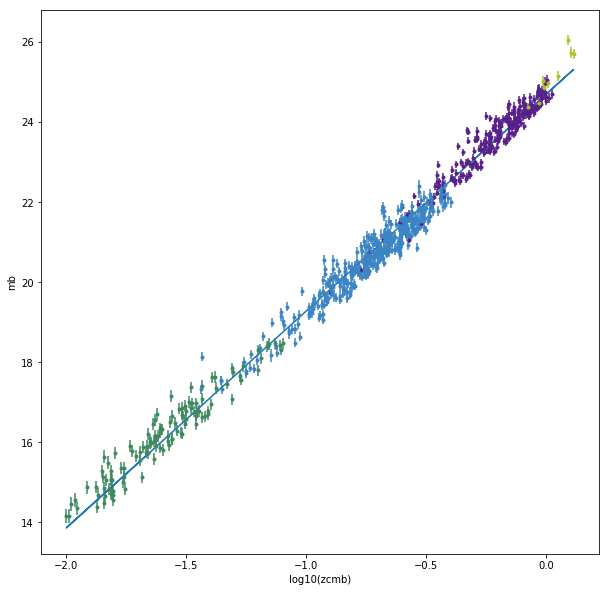

In [25]:
pl.figure(figsize=(10,10))
pl.plot(np.log10(jla.zcmb), line(np.log10(jla.zcmb), popt2[0], popt2[1]))

pl.fill_between(plottedX[sorter], 
                line(plottedX[sorter], popt2[0] + pcov2[0][0]**0.5, popt2[1] + pcov2[1][1]**0.5),
                line(plottedX[sorter], popt2[0] - pcov2[0][0]**0.5, popt2[1] - pcov2[1][1]**0.5), alpha=0.5)

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');

pl.xlabel("log10(zcmb)");
pl.ylabel("mb");

**Figure 4** Linear fit of the data in the log10 space including the uncertainties in the fit. Again, the fit line is plotted with the uncertainty band as done previously. However, for this fit and data set the uncertainty band is so small as to be almost unnoticeable to the eye.

plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

(14, 15)

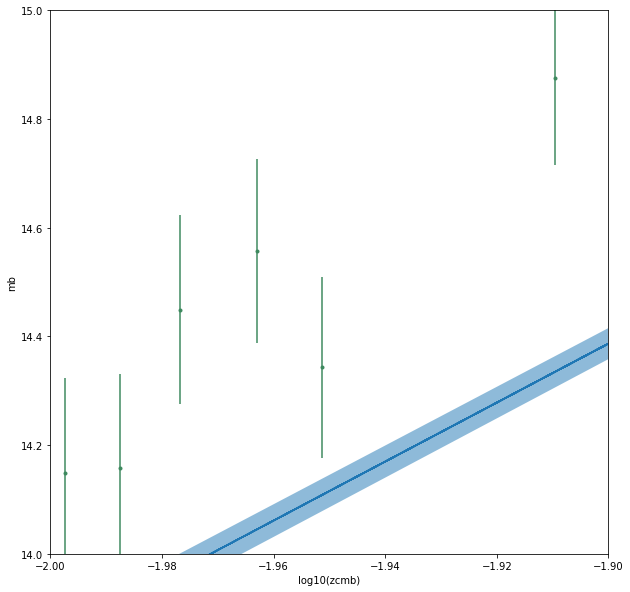

In [26]:
pl.figure(figsize=(10,10))
pl.plot(np.log10(jla.zcmb), line(np.log10(jla.zcmb), popt2[0], popt2[1]))

pl.fill_between(plottedX[sorter], 
                line(plottedX[sorter], popt2[0] + pcov2[0][0]**0.5, popt2[1] + pcov2[1][1]**0.5),
                line(plottedX[sorter], popt2[0] - pcov2[0][0]**0.5, popt2[1] - pcov2[1][1]**0.5), alpha=0.5)

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');

pl.xlabel("log10(zcmb)");
pl.ylabel("mb");
pl.xlim(-2, -1.9)
pl.ylim(14,15)


**Figure 5:** Extremely zoomed in example of the data fit with the line function to demonstrate the existence of the uncertainty band in our fit. This shows that the uncertainty band is small, but it does exist in our figure.

Compare the *model* values and uncertainty you obtained by fitting the model with and without including the uncertainties on the y values.  Comment on your findings.

Now fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Plot the new model and its uncertainty band and comment on the model: how do the three models compare?

In [0]:
slicedX = plottedX[0::20]
slicedY = jla.mb[0::20]

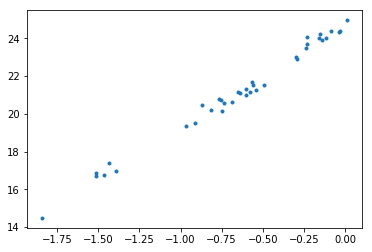

In [28]:
pl.plot(slicedX, slicedY, '.')

In [29]:
poptS, pcovS = curve_fit(line, slicedX, slicedY, sigma = jla.dmb[0::20])
print(poptS)
print(pcovS)

[ 5.47535498 24.7186065 ]
[[0.01239135 0.00666006]
 [0.00666006 0.00583256]]


In [51]:
print("values obtained for the third fit (1 in every 20 points): ")
print(f'slope = {poptS[0]:0.3f} ± {(pcovS[0][0]**0.5):0.3f}')
print(f'intercept = {poptS[1]:0.3f} ± {(pcovS[1][1]**0.5):0.3f}')
print(f'parameter covariance = {pcovS[0][1]:0.5f}')

values obtained for the third fit (1 in every 20 points): 
slope = 5.475 ± 0.111
intercept = 24.719 ± 0.076
parameter covariance = 0.00666


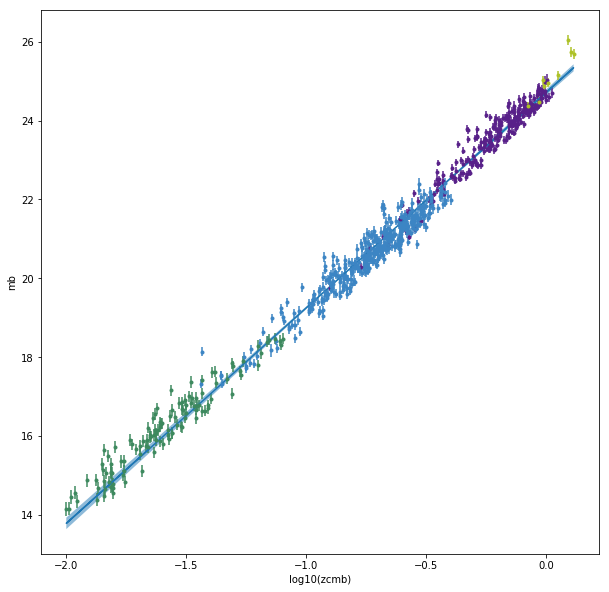

In [30]:
pl.figure(figsize=(10,10))
pl.plot(plottedX, line(plottedX, poptS[0], poptS[1]))

pl.fill_between(plottedX[sorter], 
                line(plottedX[sorter], poptS[0] + pcovS[0][0]**0.5, poptS[1] + pcovS[1][1]**0.5),
                line(plottedX[sorter], poptS[0] - pcovS[0][0]**0.5, poptS[1] - pcovS[1][1]**0.5), alpha=0.5)

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');

pl.xlabel("log10(zcmb)");
pl.ylabel("mb");

**Figure 6:** Linear fit for the data set based off of fitting on only 1 in every 20 data points. Notice that the uncertainty band for the fit is much larger now than in the previous examples (it is actually visible in this frame size.) 

#**Comparing the three models**

$|m_1-m_2|\leq 3\times\sqrt{\sigma_{m1}^2+\sigma_{m2}^2}$

This is the relationship we will use to compare the models with and without the uncertainties. If the absolute difference in the values of the two parameters is less then three times the propagated error of the uncertainties for these values, we can safely say that the two fits are in agreement and including the uncertainties does not make a significant difference in the outcome of the fit. These values will all be taken from the parameter and covariance matrix outputs of their respective fits.

**Comparing complete fit with and without error bars**

In [31]:
print('the models are in agreement ', end='')

print('if', np.abs(popt1[0]-popt2[0]), '≤', 3*(pcov1[0][0]+pcov2[0][0])**0.5, 
      '... (this is the one for slopes)')

print('the models are in agreement ', end='')
print('if', np.abs(popt1[1]-popt2[1]), '≤', 3*(pcov1[1][1]+pcov2[1][1])**0.5, 
      '... (this is the one for y-ints)')

the models are in agreement if 0.05393533106185888 ≤ 0.09945019621605557 ... (this is the one for slopes)
the models are in agreement if 0.0398850703339555 ≤ 0.07875162048267072 ... (this is the one for y-ints)


The above shows that there is no significant difference in the fit with or without the error bars for either parameter in the line function.



**Comparing complete fits with and without error bars to the selected fit**

In [32]:
print('comparing the reduced sample\'s regression to the errorbarless regression\
 the models are in agreement')

print('if', np.abs(popt1[0]-poptS[0]), '≤', 3*(pcov1[0][0]+pcovS[0][0])**0.5, 
      '... (this is the one for slopes)')
print('if', np.abs(popt1[1]-poptS[1]), '≤', 3*(pcov1[1][1]+pcovS[1][1])**0.5, 
      '... (this is the one for y-intercepts)')

print('\n~~\n')

print('comparing the reduced sample\'s regression to the errorbarful regression\
 the models are in agreement')

print('if', np.abs(popt2[0]-poptS[0]), '≤', 3*(pcov2[0][0]+pcovS[0][0])**0.5, 
      '... (this is the one for slopes)')
print('if', np.abs(popt2[1]-poptS[1]), '≤', 3*(pcov2[1][1]+pcovS[1][1])**0.5, 
      '... (this is the one for y-intercepts)')

comparing the reduced sample's regression to the errorbarless regression the models are in agreement
if 0.10330014974059942 ≤ 0.3405532061528591 ... (this is the one for slopes)
if 0.06237596662818845 ≤ 0.23608913073127166 ... (this is the one for y-intercepts)

~~

comparing the reduced sample's regression to the errorbarful regression the models are in agreement
if 0.04936481867874054 ≤ 0.34199142143737016 ... (this is the one for slopes)
if 0.022490896294232954 ≤ 0.23547767458623914 ... (this is the one for y-intercepts)


The above two blocks of code show that all of the models are in agreement for the method we chose to compare the parameters for the fits.

# Fit a quadratic equation

Use the same function ```curve_fit()``` to fit a quadratic equation to the data. 
The equation is below

Plot your data, your original model which included uncertainties, and the current quadratic model


In [0]:
def quad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * x**2 + b * x + c


In [34]:
poptq1, pcovq1 = curve_fit(quad, plottedX, jla.mb, sigma = jla.dmb )
print(poptq1)
print(pcovq1)

[ 0.34823129  5.98460069 24.83923108]
[[0.00172315 0.00276417 0.00070818]
 [0.00276417 0.00498621 0.00146466]
 [0.00070818 0.00146466 0.00059134]]


In [55]:
print("values obtained for the quadratic fit: ")
print(f'quadratic term = {poptq1[0]:0.3f} ± {(pcovq1[0][0]**0.5):0.3f}')
print(f'linear term = {poptq1[1]:0.3f} ± {(pcovq1[1][1]**0.5):0.3f}')
print(f'intercept = {poptq1[2]:0.3f} ± {(pcovq1[2][2]**0.5):0.3f}')


values obtained for the quadratic fit: 
quadratic term = 0.348 ± 0.042
linear term = 5.985 ± 0.071
intercept = 24.839 ± 0.024


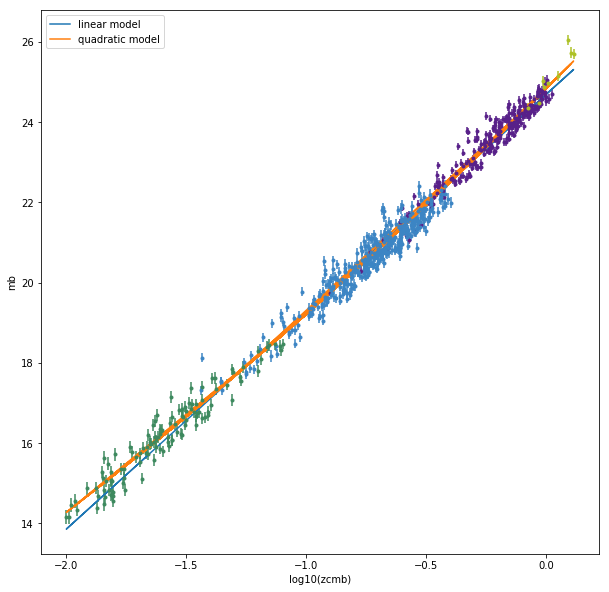

In [35]:
pl.figure(figsize=(10,10))

pl.plot(plottedX, line(plottedX, popt2[0], popt2[1]))

pl.plot(plottedX, quad(plottedX, poptq1[0], poptq1[1], poptq1[2]))

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.');

pl.xlabel("log10(zcmb)");
pl.ylabel("mb");
pl.legend(['linear model', 'quadratic model']);

**Figure 7:** Plot of the data on a log10 x scale including two fits: the linear fit with uncertainties and the quadratic fit with uncertainties.

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the input data. Make the usual plot of data and model including your baseline model with scipy

In [0]:
regr = skl.linear_model.LinearRegression()

In [37]:
regr.fit(np.atleast_2d(plottedX).T, jla.mb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

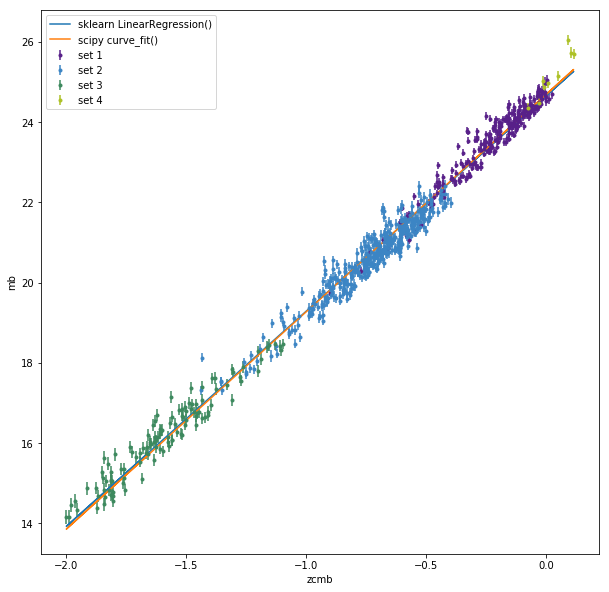

In [38]:
pl.figure(figsize = (10,10))

pl.errorbar(np.log10(set1.zcmb), set1.mb, yerr = set1.dmb, color = '#582089', fmt = '.', label = 'set 1');

pl.errorbar(np.log10(set2.zcmb), set2.mb, yerr = set2.dmb, color = '#3C85C4', fmt = '.', label = 'set 2');

pl.errorbar(np.log10(set3.zcmb), set3.mb, yerr = set3.dmb, color = '#3D895E', fmt = '.', label = 'set 3');

pl.errorbar(np.log10(set4.zcmb), set4.mb, yerr = set4.dmb, color = '#ADC126', fmt = '.', label = 'set 4');

pl.xlabel("zcmb")
pl.ylabel("mb");
pl.plot(plottedX, regr.predict(np.atleast_2d(plottedX).T), '-', label="sklearn LinearRegression()")
pl.plot(plottedX, line(plottedX, popt2[0], popt2[1]), 
        "-", label="scipy curve_fit()")

pl.legend()
pl.xlabel("zcmb")
pl.ylabel("mb");

**Figure 8:** Comparison of the linear fits of the data set using scipy.optimize and sklearn. Although the two lines both fit the data closely, one can observe the slight difference between the scipy fit (the orange line) and the sklearn (the blue line).

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


In [0]:
"""# handmade train-test split
Nall = len(jla)
Ntrain = int(Nall * 0.75)
train = numpy.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)
X_train, y_train = jla.zcmb[train], jla.mb[train]
X_test, y_test = jla.zcmb[test], jla.mb[test]
pl.plot(X_train, y_train, 'k.', label="train")
pl.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
pl.xlabel("X")
pl.ylabel("y")
pl.legend()""";

In [0]:
#instead use sklern to split
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(plottedX, jla.mb, test_size = 0.25, train_size = 0.75)


Plot the data, the baseline mode, and the new model, but colorcode the data based on the training or test set (instead othe survey it comes from like you had done before)

In [0]:
regr1 = skl.linear_model.LinearRegression()

In [42]:
regr1.fit(np.atleast_2d(X_train).T, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

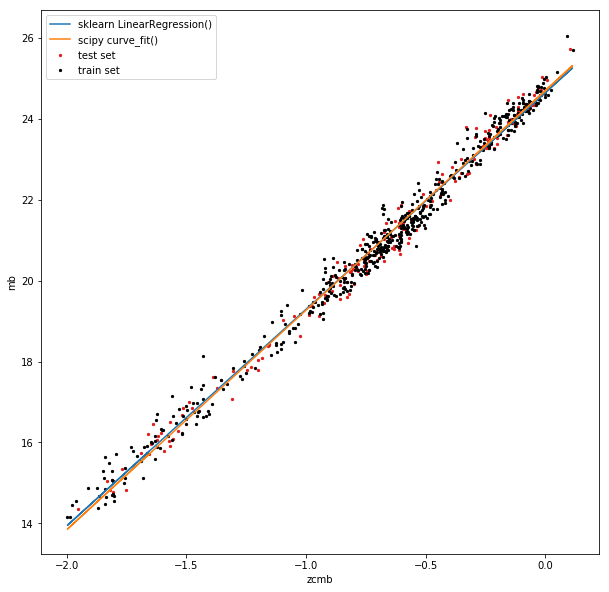

In [43]:
pl.figure(figsize = (10,10))

pl.scatter(X_test, y_test, s = 5, color = '#E31A1A', label = 'test set')
pl.scatter(X_train, y_train, s = 5, color = '#000000', label = 'train set')

pl.plot(plottedX, regr1.predict(np.atleast_2d(plottedX).T), '-', label="sklearn LinearRegression()")

pl.plot(plottedX, line(plottedX, popt2[0], popt2[1]), 
        "-", label="scipy curve_fit()")

pl.legend();
pl.xlabel("zcmb")
pl.ylabel("mb");

**Figure 9:** Comparison of the scipy fit of the data with the sklearn fit of the training set of the data (75% of the original data set distributed randomly) The two curve fits are very close to each other. This result combined with the comparison of the scores for the test and train set show how this model is a good fit for the data set. 

<span style="color:red">**-1 pt: plot has no uncertainty**</span>

Calculate the scores of the train and test set. Make considerations about the quality of the model including how robust it is (is it overfitting?)

In [44]:
print("Score for the training set: ", np.round(regr1.score(np.atleast_2d(X_train).T, y_train), 4))

Score for the training set:  0.9872


In [45]:
print("Score for the test set: ", np.round(regr1.score(np.atleast_2d(X_test).T, y_test), 4))

Score for the test set:  0.9882


#Analysis
The two results from above show that this model is extremely robust for this data set. When splitting the whole data set into a test subset and a train subset, the model performs almost equally well on each of the sets. Thus, our model can be applied to the whole data set. There is little concern of overfitting the data because of this result and the fact that a line fit only has two paramaters, so it is very tough for such a fit to be overfitting the data set. 

If the score for the test set had been significantly less than the score for the training set, we could have concluded that the line was overfitting the training set of data and was not applicable for the total scaling set. However, this was not the case, so the logarithm scaling law for this data set seems to hold.